# Basic of networkx

In [2]:
!pip install networkx

mkl-random 1.0.1 requires cython, which is not installed.
tensorflow 1.10.0 has requirement numpy<=1.14.5,>=1.13.3, but you'll have numpy 1.15.2 which is incompatible.
tensorflow 1.10.0 has requirement setuptools<=39.1.0, but you'll have setuptools 40.2.0 which is incompatible.
You are using pip version 10.0.1, however version 20.3.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random
# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

In [ ]:
# !pip install networkx

In [4]:
"""Creating a Graph object and assigning it to G"""
G = nx.Graph()

"""To add a node"""
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)

"""To view the Node"""
G.nodes()     

NodeView((1, 2, 3, 4, 5, 6))

In [5]:
"""Adding Edges"""

G.add_edge(2,3)
G.add_edge(1,3)
G.add_edge(4,6)
G.add_edge(2,3)
G.add_edge(4,5)
G.add_edge(1,2)

"""View the edges"""
print(G.edges())

"""Adding another edge and viewing the change"""
G.add_edge(2,6)
print(G.edges())

[(1, 2), (1, 3), (2, 3), (4, 5), (4, 6)]
[(1, 2), (1, 3), (2, 3), (2, 6), (4, 5), (4, 6)]


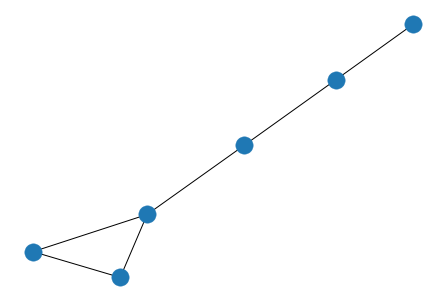

In [6]:
nx.draw(G)
plt.show()

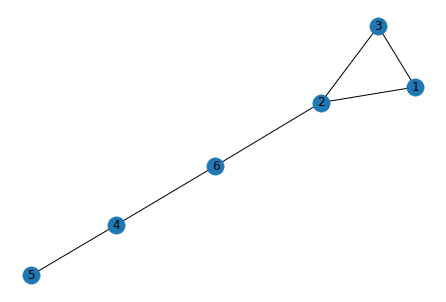

In [7]:
nx.draw(G, with_labels = True)
plt.show()

In [8]:
"""Complete Graph: Generates complete Graph of assigned vertices and assigns it to the variable mentioned
Complete Graph means it put all possible edges between these 10 (specified) nodes"""
Z = nx.complete_graph(10)
Z.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [9]:
print(Z.edges())

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


In [10]:
"""Z.order() : Number of Nodes in the graph"""
print(Z.order())

"""Z.size() : Number of Edges in the Nodes"""
print(Z.size())

10
45


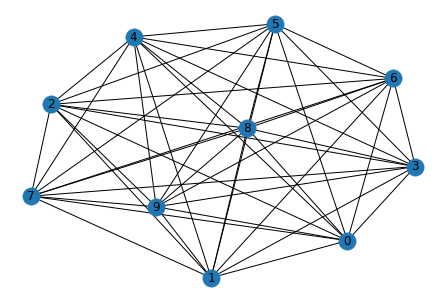

In [11]:
nx.draw(Z, with_labels = True)
plt.show()

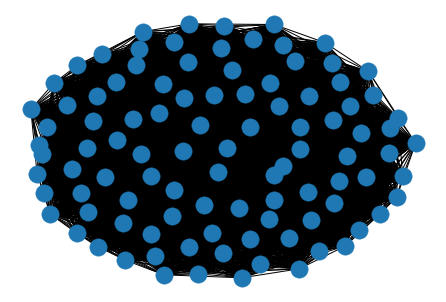

In [12]:
H = nx.complete_graph(100)
nx.draw(H)
plt.show()

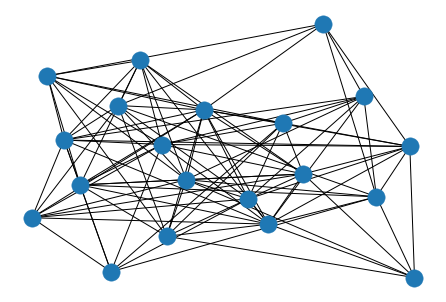

In [13]:
"""Built In Function:
 - nx.gnp_random_graph(20, 0.5):  Graph is generated on 20 vertices
                                 For edges we are using PROBABILITY 0.5
                                To understand, we put the edge when we get head and we dont put the edge when we get tail
                                We put the edge when prob = 0.5 and we dont put the edge when we get 1-0.5"""
G = nx.gnp_random_graph(20,0.5)
nx.draw(G)
plt.show()

 # Modelling road network of India's cities

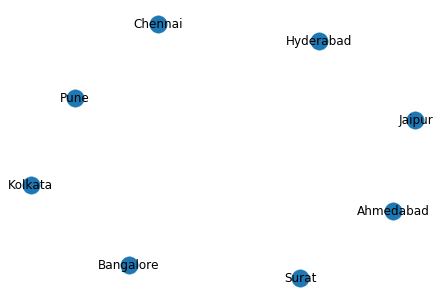

In [14]:
G = nx.Graph()   # Unidirected Network Graph
"""G = nx.DiGraph() # Directed Network Graph"""

city_set = [ 'Bangalore', 'Hyderabad', 'Ahmedabad', 'Chennai', 'Kolkata', 'Surat', 'Pune', 'Jaipur']

for each in city_set:
    G.add_node(each)  # adds node to each city
    
nx.draw(G, with_labels = 1)
plt.show()

In [15]:
"""
G.number_of_edges() :  shows number of edges in network
G.has_edge(c1,c2): returns True if node has the specified edges. Else: False
"""



'\nG.number_of_edges() :  shows number of edges in network\nG.has_edge(c1,c2): returns True if node has the specified edges. Else: False\n'

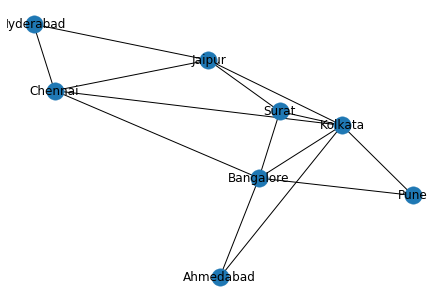

In [16]:
"""Add edges between the cities"""
# Adding random edges and cost which will be stored in the list and later on picked from that list

costs = []
value = 100     # we will add 20 values in costs: 100-2000
while value<= 2000:
    costs.append(value)
    value += 100
    
#  adding 16 edges to this network
while G.number_of_edges() < 16:
#     Now we choose two nodes randomly 
    c1 = random.choice(list(G.nodes()))
    c2 = random.choice(list(G.nodes()))
    """
    We assign weights to the city: but we cannot assign weights to same city. hence we use if statement
    Also another situation could be: when there is already an edge present in the node. Hence we use built in function has_edge() with if statement
    """
    if c1 != c2 or G.has_edge(c1,c2) == False:
#         we add weight
        w = random.choice(costs)
#         we add edge(c1,c2, weight = w)
        G.add_edge(c1,c2, weight = w)
    
nx.draw(G,with_labels = 1)
plt.show()

## Layout of the Graph

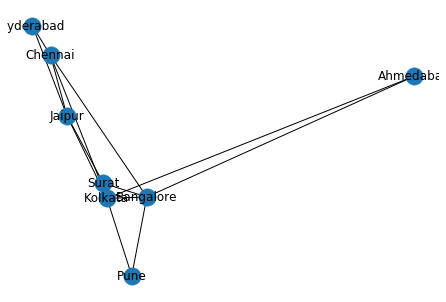

In [17]:
"""We can change the Layout of the Graph too"""

# Spectral Layout
pos = nx.spectral_layout(G)
nx.draw(G, pos, with_labels=1)
plt.show()



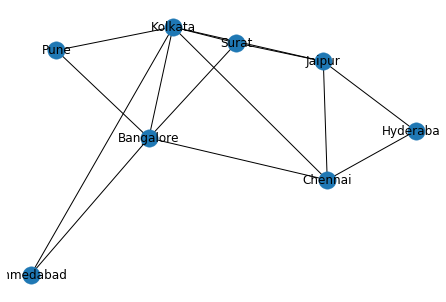

In [18]:
# Spring Layout
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=1)
plt.show()

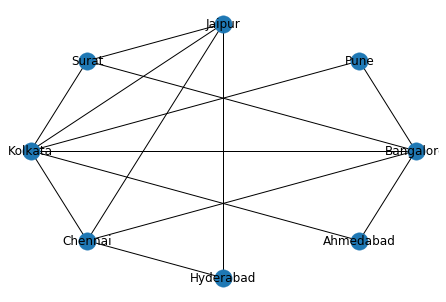

In [19]:
# Circular Layout
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=1)
plt.show()

## Labelling Edge weights


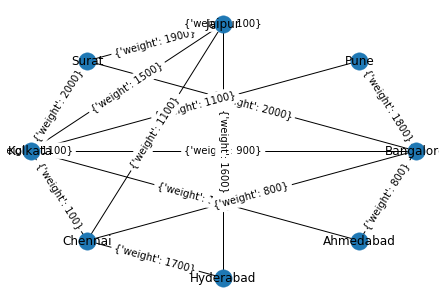

In [20]:

pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=1)
nx.draw_networkx_edge_labels(G, pos)

plt.show()

## Checking Paths between the cities
- Can we travel from one city to other: Yes, if graph is connected. Hence, first we check that.


In [21]:
"""nx.is_connected(G): Returns true if the graph is connected"""
print(nx.is_connected(G))

True


True


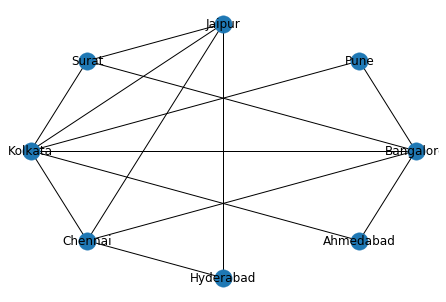

In [22]:
"""We make the network NOT connected for the purpose of the course
We can do that by reducing the number of edges (in the while loop)"""

costs = []
value = 100     # we will add 20 values in costs: 100-2000
while value<= 2000:
    costs.append(value)
    value += 100

#  adding 5 edges to this network: to make it disconnected network
while G.number_of_edges() <5:
#     Now we choose two nodes randomly 
    c1 = random.choice(city_set)
    c2 = random.choice(city_set)
    """
    We assign weights to the city: but we cannot assign weights to same city. hence we use if statement
    Also another situation could be: when there is already an edge present in the node. 
    Hence we use built in function has_edge() with if statement
    """
    if c1 != c2 or G.has_edge(c1,c2) == 0:
#         we add weight
        w = random.choice(costs)
#         we add edge(c1,c2, weight = w)
        G.add_edge(c1,c2, weight = w)
    
    
# """Checking if graph is disconnected now"""
print(nx.is_connected(G))
pos = nx.circular_layout(G)
nx.draw(G,pos,with_labels = 1)
plt.show()

Bangalore Bangalore True
Bangalore Pune True
Bangalore Jaipur True
Bangalore Surat True
Bangalore Kolkata True
Bangalore Chennai True
Bangalore Hyderabad True
Bangalore Ahmedabad True
Pune Bangalore True
Pune Pune True
Pune Jaipur True
Pune Surat True
Pune Kolkata True
Pune Chennai True
Pune Hyderabad True
Pune Ahmedabad True
Jaipur Bangalore True
Jaipur Pune True
Jaipur Jaipur True
Jaipur Surat True
Jaipur Kolkata True
Jaipur Chennai True
Jaipur Hyderabad True
Jaipur Ahmedabad True
Surat Bangalore True
Surat Pune True
Surat Jaipur True
Surat Surat True
Surat Kolkata True
Surat Chennai True
Surat Hyderabad True
Surat Ahmedabad True
Kolkata Bangalore True
Kolkata Pune True
Kolkata Jaipur True
Kolkata Surat True
Kolkata Kolkata True
Kolkata Chennai True
Kolkata Hyderabad True
Kolkata Ahmedabad True
Chennai Bangalore True
Chennai Pune True
Chennai Jaipur True
Chennai Surat True
Chennai Kolkata True
Chennai Chennai True
Chennai Hyderabad True
Chennai Ahmedabad True
Hyderabad Bangalore True

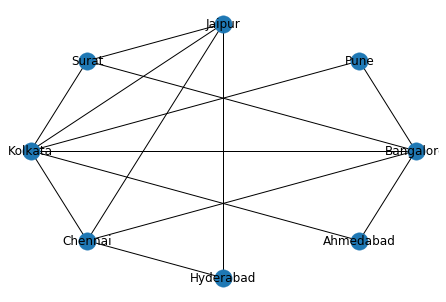

In [23]:
"""
Now we check if the path between two cities exists or not
.has_path(G,u,v): takes in Network, city1, city2 and returns True if path exists
"""

for u in G.nodes():
    for v in G.nodes():
        print(u,v,nx.has_path(G,u,v))
        
        
        
# Let's visualize the network simultaneously
pos = nx.circular_layout(G)
nx.draw(G,pos,with_labels = 1)
plt.show()

In [24]:
def create_network(city, costs, num_edges):
    G = nx.Graph()   # Unidirected Network Graph
    """G = nx.DiGraph() # Directed Network Graph"""

    

    for each in city:
        G.add_node(each)  # adds node to each city
        
    #  adding 5 edges to this network: to make it disconnected network
    while G.number_of_edges() <num_edges:
    #     Now we choose two nodes randomly 
        c1 = random.choice(city)
        c2 = random.choice(city)
        """
        We assign weights to the city: but we cannot assign weights to same city. hence we use if statement
        Also another situation could be: when there is already an edge present in the node. 
        Hence we use built in function has_edge() with if statement
        """
        if c1 != c2 or G.has_edge(c1,c2) == 0:
    #         we add weight
            w = random.choice(costs)
    #         we add edge(c1,c2, weight = w)
            G.add_edge(c1,c2, weight = w)
    return G

In [25]:
"""Defining Citites"""
city_set = ['Delhi','Bangalore', 'Hyderabad', 'Ahmedabad', 'Chennai', 'Kolkata', 'Surat', 'Pune', 'Jaipur']


"""Add edges between the cities"""
# Adding random edges and cost which will be stored in the list and later on picked from that list

costs = []
value = 100     # we will add 20 values in costs: 100-2000
while value<= 2000:
    costs.append(value)
    value += 100

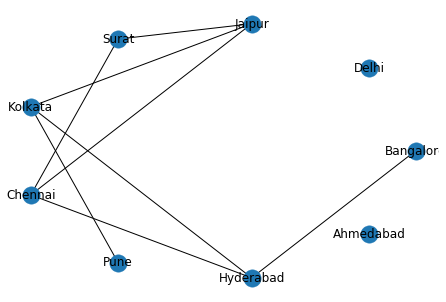

In [26]:
G = create_network(city= city_set, costs =costs, num_edges = 10)
pos = nx.circular_layout(G)
nx.draw(G,pos,with_labels = 1)
plt.show()

## Shortest path algorithms for weighed graphs.

In [27]:
u = 'Bangalore'
v = 'Surat'

"""Shortest Route"""
print(nx.dijkstra_path(G, u, v))

['Bangalore', 'Hyderabad', 'Chennai', 'Surat']


In [35]:
"""Shortest Distance"""
print(nx.dijkstra_path_length(G,'Bangalore','Kolkata'))

300


In [42]:
"""When no path is possible we get key error
We can use exception handling to get rid of the error.
print something like infinity etc."""
G = create_network(city_set, costs, 0)
print(nx.dijkstra_path_length(G, 'Bangalore','Hyderabad'))

NetworkXNoPath: Node Hyderabad not reachable from Bangalore

In [43]:
for num_edge in [0,5,7,10,20,30]:
    G = create_network(city_set, costs, num_edges = num_edge)
    try: 
        l = nx.dijkstra_path_length(G,'Delhi', 'Bangalore')
    except:
        l = 1000000
    print("Path Length = ", l)

Path Length =  1000000
Path Length =  1000000
Path Length =  1100
Path Length =  1000000
Path Length =  1300
Path Length =  400


In [44]:
def add_random_edge(G, costs):
#     Now we choose two nodes randomly 
    c1 = random.choice(list(G.nodes()))
    c2 = random.choice(list(G.nodes()))
    """
    We assign weights to the city: but we cannot assign weights to same city. hence we use if statement
    Also another situation could be: when there is already an edge present in the node. 
    Hence we use built in function has_edge() with if statement
    """
    if c1 != c2 or G.has_edge(c1,c2) == 0:
#         we add weight
        w = random.choice(costs)
#         we add edge(c1,c2, weight = w)
        G.add_edge(c1,c2, weight = w)

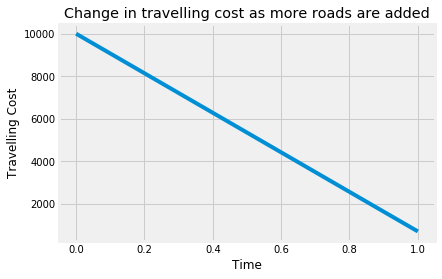

In [48]:
# l = 10000
"""Plotting a graph"""
x = [0] # x axis
y = [l] # y axis (Very big number)
for t in range(1,11):
    add_random_edge(G,costs)
    x.append(t)
    try:
        l = nx.dijkstra_path_length(G, 'Surat', 'Bangalore')
        y.append(l)
        break 
    except:
        l = 10000
        y.append(10000)
    

plt.xlabel('Time')
plt.ylabel('Travelling Cost')
plt.title('Change in travelling cost as more roads are added')
plt.plot(x,y)
plt.show()